In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import json
from google.colab import drive
from datetime import timedelta


drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/mq_benchamrk_result/'

data = {}

def visualize_cpu_usage():
    for root, dirs, files in os.walk(os.path.join(data_folder, 'GCTIME')):
        for file in files:
            if file.endswith(".csv"):
                current_provider = root.split('/')[-1]
                current_load_size = root.split('/')[-2].split("_")[0]

                df = pd.read_csv(os.path.join(root, file), usecols=[0, 1], skiprows=[0])
                df = df.rename(columns={df.columns[0]: "datetime", df.columns[1]: "value"})

                df['datetime'] = pd.to_datetime(df['datetime'])
                df['datetime'] = pd.to_datetime("2023-07-08 02:00:00")

                time_diff = timedelta(seconds=10)
                df['datetime'] = df['datetime'] + df.index * time_diff
                df['datetime'] = (df['datetime'].dt.minute * 60) + df['datetime'].dt.second

                temp = df.iloc[:181, ]

                if current_load_size not in data:
                    data[current_load_size] = {}
                if current_provider not in data[current_load_size]:
                    data[current_load_size][current_provider] = temp

visualize_cpu_usage()

# print(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
rocketmq_data = {
    'datetime': list(range(0, 1810, 10)),
    'value': [0] * 181
}

# Add RocketMQ data to the dictionary for each load size
data['100kb']['rocketmq'] = pd.DataFrame(rocketmq_data)
data['1000kb']['rocketmq'] = pd.DataFrame(rocketmq_data)
data['10kb']['rocketmq'] = pd.DataFrame(rocketmq_data)


In [26]:
# data

In [27]:
%cd /content/drive/MyDrive/
!pwd
!mkdir jvm_based_garbage_collection
%cd jvm_based_garbage_collection
!pwd
!pip3 install -U kaleido

/content/drive/MyDrive
/content/drive/MyDrive
/content/drive/MyDrive/jvm_based_garbage_collection
/content/drive/MyDrive/jvm_based_garbage_collection


In [28]:
data

{'10kb': {'artemis':      datetime  value
  0           0   1.80
  1          10   1.80
  2          20   1.81
  3          30   1.81
  4          40   1.82
  ..        ...    ...
  176      1760   2.32
  177      1770   2.33
  178      1780   2.33
  179      1790   2.34
  180      1800   2.34
  
  [181 rows x 2 columns],
  'pulsar':      datetime  value
  0           0  0.148
  1          10  0.148
  2          20  0.148
  3          30  0.148
  4          40  0.148
  ..        ...    ...
  176      1760  0.805
  177      1770  0.805
  178      1780  0.805
  179      1790  0.805
  180      1800  0.821
  
  [181 rows x 2 columns],
  'kafka':      datetime  value
  0           0  0.486
  1          10  0.488
  2          20  0.491
  3          30  0.493
  4          40  0.496
  ..        ...    ...
  176      1760  0.903
  177      1770  0.905
  178      1780  0.907
  179      1790  0.911
  180      1800  0.913
  
  [181 rows x 2 columns],
  'rocketmq':      datetime  value
  0         

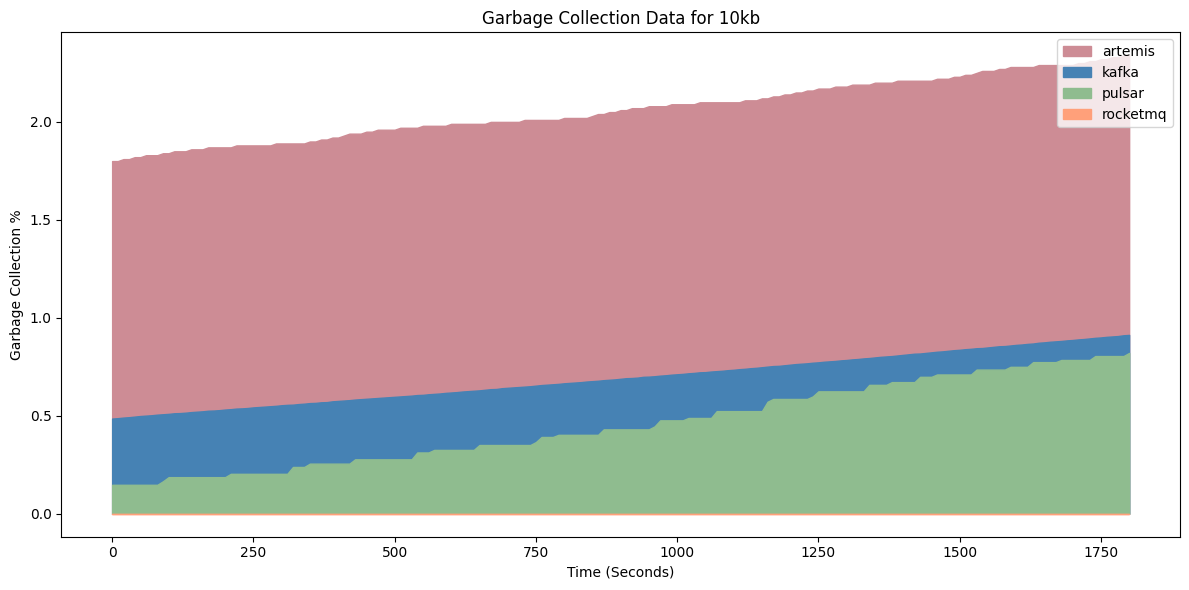

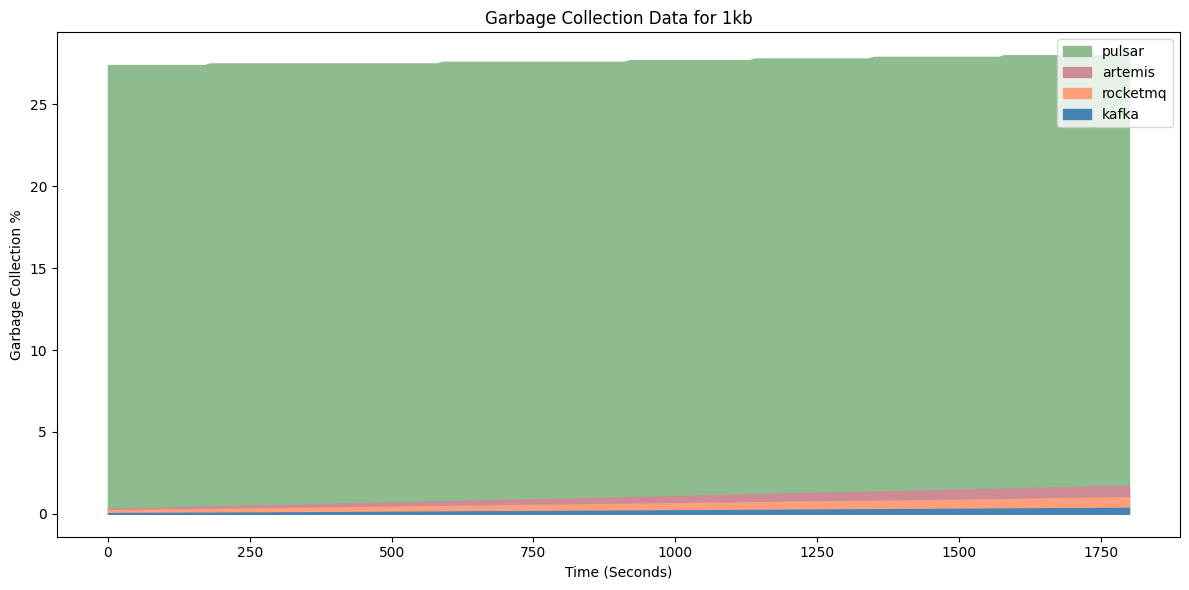

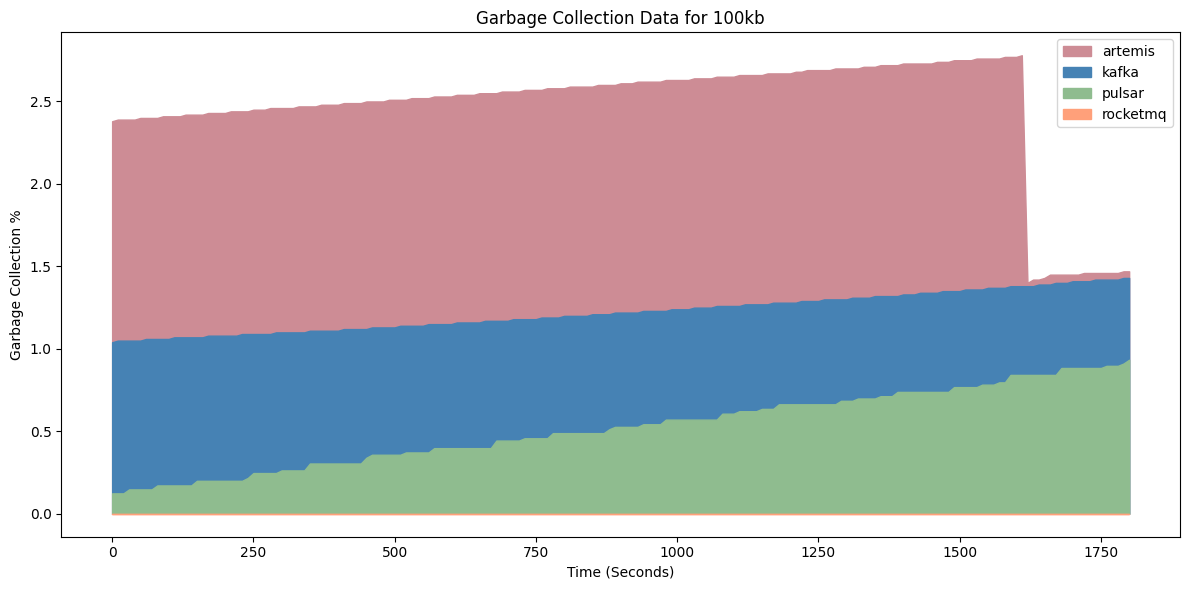

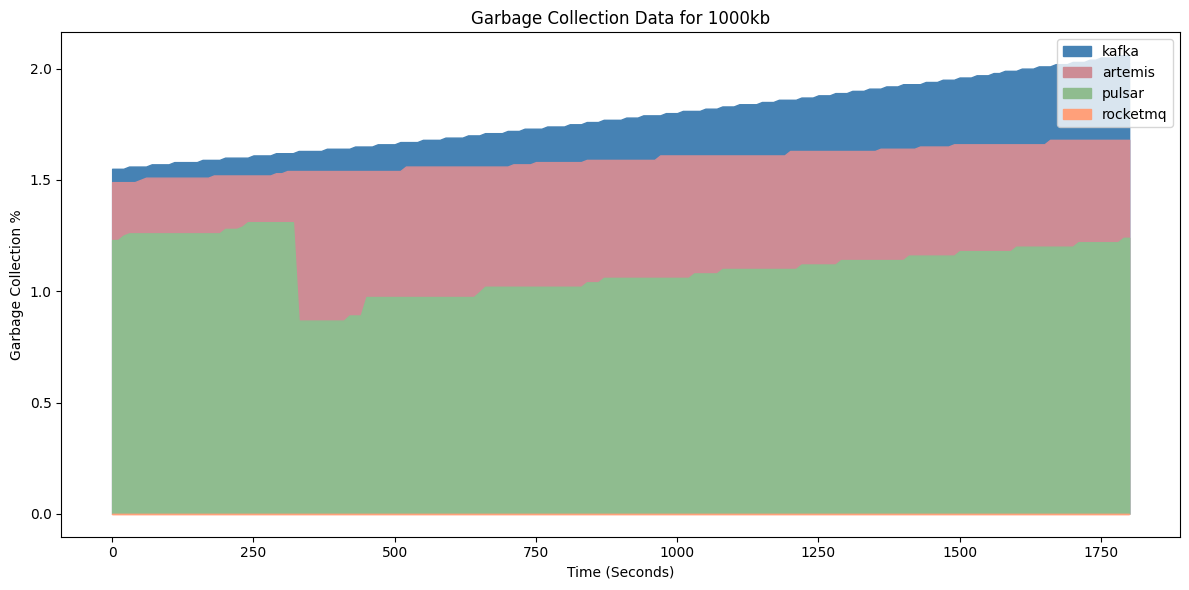

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# colors = {
#     'artemis': '#4682B4',  # Steel Blue
#     'kafka': '#CD8C95',    # Dusty Rose
#     'pulsar': 'darkseagreen',   # Cadet Blue
#     'rocketmq': '#FF8C00'  # Dark Orange
# }

colors = {
    'artemis': '#CD8C95',  # Gold
    'kafka': '#4682B4',    # Lime Green
    'pulsar': 'darkseagreen',   # Royal Blue
    'rocketmq': '#FFA07A'  # Light Salmon
}

# Assuming you already have the 'data' dictionary containing your data
for load_size, providers in data.items():
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_title(f'Garbage Collection Data for {load_size}')
    ax.set_xlabel('Time (Seconds)')
    ax.set_ylabel('Garbage Collection %')

    sorted_providers = sorted(providers.items(), key=lambda x: x[1]['value'].sum(), reverse=True)

    for provider, df in sorted_providers:
        ax.fill_between(df['datetime'], 0, df['value'], label=provider, color=colors.get(provider, 'gray'))

    ax.legend()
    plt.tight_layout()
    plt.savefig(f'{load_size}_garbage_collection.pdf', dpi=300)
    plt.show()
